##### [Regresar al índice](./indice.ipynb)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
print("ok")

ok


### Datos y tabla de frecuencias

In [5]:
# 1. Generar 500 datos continuos aleatorios entre 0 y 10
np.random.seed(0)
data = np.random.uniform(0, 10, 500)
df_raw = pd.DataFrame({'valor': data})
df_sorted = df_raw.sort_values('valor').reset_index(drop=True)

# 2. Mostrar datos crudos y ordenados
print("Datos crudos (500 valores):")
display(df_raw)
print("\nDatos ordenados (500 valores):")
display(df_sorted)

# —————————————
# *Aquí añadimos la creación de los intervalos*
# Definimos 5 intervalos iguales de 0 a 10 y asignamos etiqueta a cada dato
n_intervalos = 5
bins = np.linspace(0, 10, n_intervalos + 1)
etiquetas = [f"[{bins[i]:.1f}, {bins[i+1]:.1f})" for i in range(n_intervalos)]
df_raw['intervalo'] = pd.cut(df_raw['valor'],
                             bins=bins,
                             include_lowest=True,
                             labels=etiquetas)

# 3. Construir y mostrar tabla de frecuencias con formato ‘índice + columnas en Español’
freq_abs = df_raw['intervalo'].value_counts().sort_index()
freq_rel = freq_abs / len(df_raw)
freq_cum = freq_abs.cumsum()

tabla = pd.DataFrame({
    'Intervalo': freq_abs.index.astype(str),
    'Frecuencia Absoluta': freq_abs.values,
    'Frecuencia Relativa': np.round(freq_rel.values, 3),
    'Frecuencia Acumulada': freq_cum.values
})

# Imprime la tabla con índice y columnas en español:
print("\nTabla de frecuencias:")
print(tabla.to_string(index=True))

Datos crudos (500 valores):


,valor
0,5.488135
1,7.151894
2,6.027634
3,5.448832
4,4.236548
...,...
495,2.716528
496,4.554441
497,4.017135
498,2.484135



Datos ordenados (500 valores):


,valor
0,0.046955
1,0.114275
2,0.117141
3,0.120362
4,0.132369
...,...
495,9.903389
496,9.903450
497,9.920112
498,9.944008



Tabla de frecuencias:
     Intervalo  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0   [0.0, 2.0)                   99                0.198                    99
1   [2.0, 4.0)                  106                0.212                   205
2   [4.0, 6.0)                   99                0.198                   304
3   [6.0, 8.0)                   98                0.196                   402
4  [8.0, 10.0)                   98                0.196                   500


### Histograma y diagrama de barras horizontales

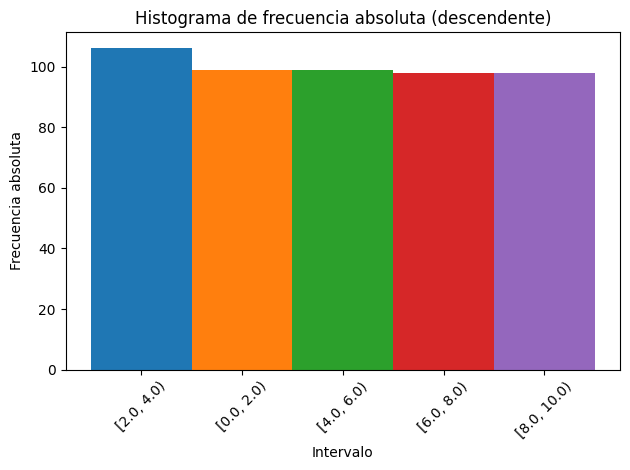

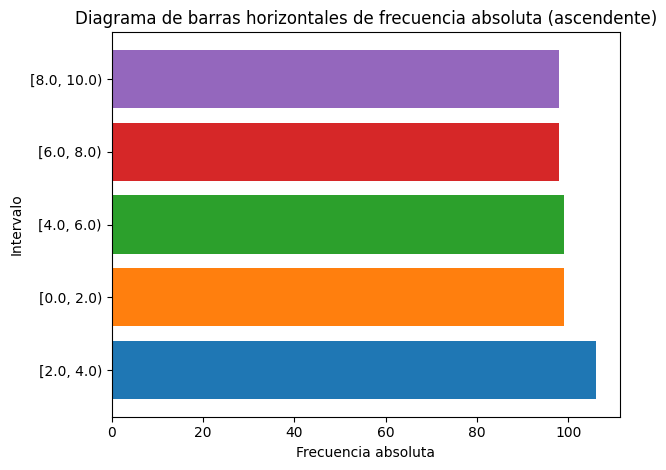

In [7]:
# Histograma de frecuencia absoluta (de mayor a menor, sin espacios)
freq_desc = freq_abs.sort_values(ascending=False)
plt.figure()
colors = plt.cm.tab10(np.arange(len(freq_desc)))
plt.bar(freq_desc.index, freq_desc.values, color=colors, width=1.0)
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma de frecuencia absoluta (descendente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Diagrama de barras horizontales de frecuencia absoluta (de menor a mayor)
freq_asc = freq_abs.sort_values(ascending=False)
plt.figure()
colors_h = plt.cm.tab10(np.arange(len(freq_asc)))
plt.barh(freq_asc.index, freq_asc.values, color=colors_h)
plt.xlabel('Frecuencia absoluta')
plt.ylabel('Intervalo')
plt.title('Diagrama de barras horizontales de frecuencia absoluta (ascendente)')
plt.tight_layout()
plt.show()


### Polígono de frecuencias

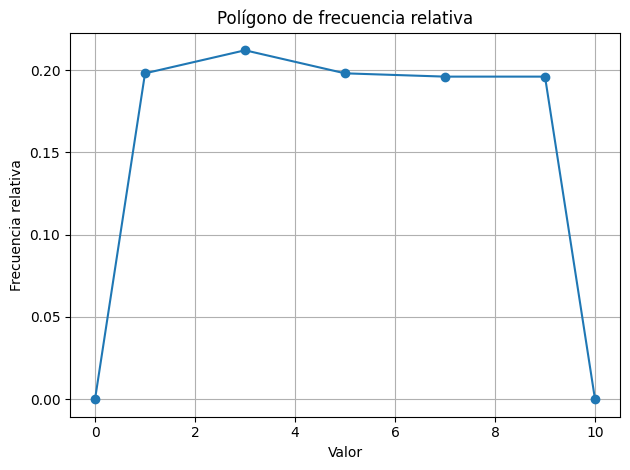

In [12]:
# 6. Polígono de frecuencia relativa con etiquetas y grid sobre el Axes
midpoints = (bins[:-1] + bins[1:]) / 2
x_poly = np.concatenate(([bins[0]], midpoints, [bins[-1]]))
y_poly = np.concatenate(([0], freq_rel.values, [0]))

fig, ax = plt.subplots()
ax.plot(x_poly, y_poly, marker='o')
ax.set_xlabel('Valor')                 
ax.set_ylabel('Frecuencia relativa')   
ax.set_title('Polígono de frecuencia relativa')
ax.grid(True)                          # Activa cuadrícula en el Axes
plt.tight_layout()
plt.show()


### Diagrama de pastel

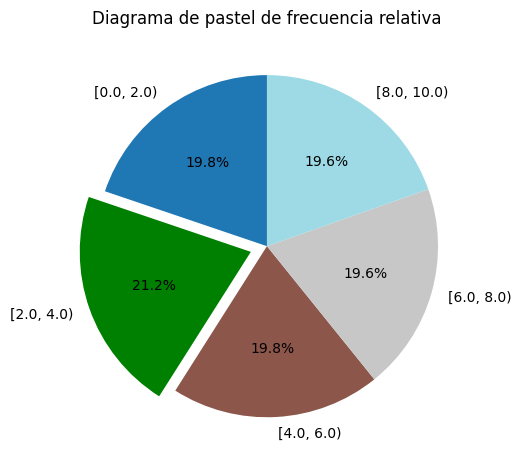

In [16]:
# 2. Generar paleta de colores y asignar un color distinto a cada slice
palette = plt.cm.tab20(np.linspace(0, 1, len(freq_rel)))
colors_pie = [
    'green' if v == freq_rel.max() else palette[i]
    for i, v in enumerate(freq_rel)
]

# 3. Dibujar el diagrama de pastel
plt.figure()
plt.pie(
    freq_rel.values,
    labels=etiquetas,
    startangle=90,
    explode=[0.1 if v == freq_rel.max() else 0 for v in freq_rel],
    colors=colors_pie,
    autopct='%1.1f%%'
)
plt.title('Diagrama de pastel de frecuencia relativa')
plt.tight_layout()
plt.show()


### Ojiva

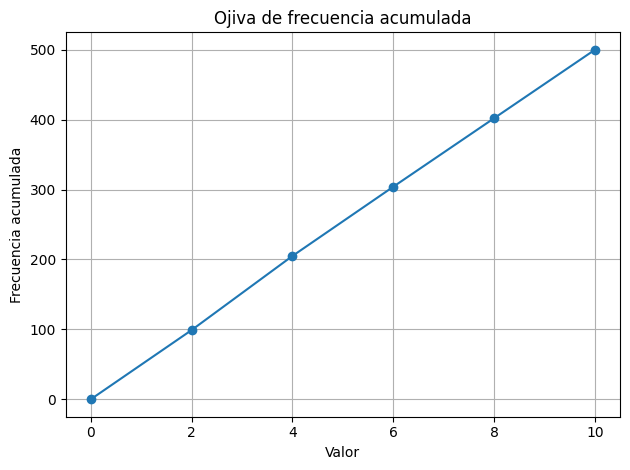

In [17]:
# Coordenadas de la ojiva: arranca en 0 y termina en el acumulado máximo
x_ojiva = bins
y_ojiva = np.concatenate(([0], freq_cum.values))

# Dibujar ojiva
fig, ax = plt.subplots()
ax.plot(x_ojiva, y_ojiva, marker='o')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia acumulada')
ax.set_title('Ojiva de frecuencia acumulada')
ax.grid(True)
plt.tight_layout()
plt.show()